# Projet de programmation

[Télécharger les données et ce document](progproj.zip)

Prénom et nom de chaque participant:

* BLACHON Tom
* DONOR Felita
* BEDDAR Meyssa
* SIMOES Matthieu

L'ensemble des étapes du projet ont été réalisées de manière collaborative, ainsi chaque participant a contribué à l'ensemble du projet.


## Description de l'objectif

* Intégrer la représentation du réseau parisien accessible au vélo et les informations de nivellement
* Définir une fonction permettant, étant donnés deux points $A$ et $B$, de calculer le plus court chemin entre ces deux points (critère de distance uniquement)
* Établir une carte de centralité des arêtes en dénombrant, pour chaque arête, le nombre de chemins les plus courts qui la traversent ([edge betweenness](https://link.springer.com/referenceworkentry/10.1007%2F978-1-4419-9863-7_874#:~:text=Definition,an%20edge%20betweenness%20centrality%20value.))
* Définir une fonction permettant, étant donnés deux points $A$ et $B$, de calculer un chemin entre ces deux points avec un maximum de confort
* Établir une carte de centralité des arêtes d'après ce nouveau critère

Si vous trouvez le projet trop facile: Intégrez ces calculs à OSMnx pour en faire une application web interactive.



### Importation  des bibliothèques et modules

In [51]:
import json
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cm
import pandas as pd
%matplotlib inline
import pysal as ps
import libpysal
import numpy as np
import osmnx as ox
import networkx as nx
from geopandas import GeoDataFrame
from shapely.geometry import Point
from libpysal.cg.voronoi  import voronoi, voronoi_frames

## I) Intégrer la représentation du réseau parisien accessible au vélo

#### Création d'un graphe à partir du quartier de Belleville avec le module "ox" de Osmnx

In [52]:
plot = ox.graph_from_place('Quartier de Belleville, Paris, France', network_type='bike', simplify=True)

#### Affichage du quartier de Belleville à Paris

Text(0.5, 1.0, 'Quartier de Belleville, Paris')

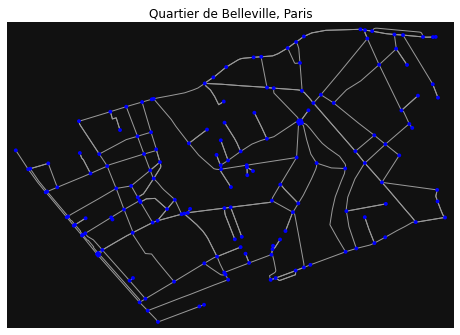

In [53]:
fig, ax = ox.plot_graph(plot, node_color='blue',show=False,close = False)
ax.set_title('Quartier de Belleville, Paris')

## II)Plus court chemin entre un point A et un point B du réseau

#### Recherche du plus court chemin entre deux points A et B

In [54]:
# Choix d'un point de départ (A) et d'un point d'arrivée (B)

A = list(plot)[150]
B = list(plot)[25]

# Détermination à l'aide de la fonction shortest_path de networkx du plus court chemin entre les points de départ et d'arrivée 

path=nx.shortest_path(plot, A, B)

#### Affichage du plus court chemin

Text(0.5, 1.0, 'Chemin le plus court entre A et B')

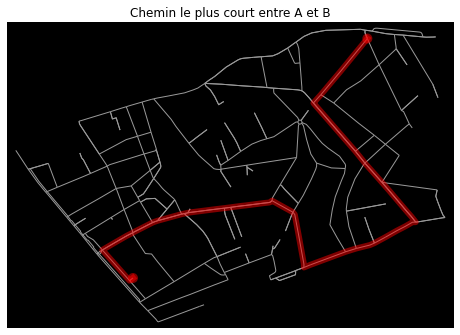

In [55]:
fig, ax=ox.plot_graph_route(plot, path, route_linewidth=6, node_size=0, bgcolor='k',show=False,close=False)

ax.set_title('Chemin le plus court entre A et B')

## III)Edge beetweness

Pour calculer la centralité des arêtes, nous avons décidé la fonction edge_betweenness_centrality de networkx, qui se base sur la formule présentée ci-dessus.

- V est l'ensemble de noeuds,
- σ(s,t) est le nombre de chemins les plus courts,
- σ(s,t|e) est le nombre de ces chemins passant par l'arrête e.

Ainsi, la centralité d'une arête peut etre définie comme le nombre de plus courts chemins qui passent par cette arête dans un graphe. 

#### Calcul de la centralité des arêtes de notre graphe

In [57]:
edge_b = nx.edge_betweenness_centrality(plot)

In [58]:
edge_b

{(60912115, 682260684): 0.08537142582305268,
 (60912123, 96149597): 0.0657600461727148,
 (60912205, 268499816): 0.005194430416275882,
 (60912205, 250732799): 0.06828511651396003,
 (60912206, 268499229): 0.17967719180113667,
 (60912208, 148944195): 0.19174301998412813,
 (60912208, 3041016646): 0.11532397053282993,
 (94130189, 94130192): 0.013554216867469878,
 (94130189, 3647346703): 0.26300491386704505,
 (94130192, 96135613): 0.08716903542312963,
 (94130192, 94130189): 0.20344852463747204,
 (94130192, 500581682): 0.009273621431835126,
 (94130199, 96135607): 0.01736887670442248,
 (94130199, 258585914): 0.006348748286559411,
 (94130199, 96134192): 0.26347305389221554,
 (94130199, 96149607): 0.0024529254743524995,
 (94153948, 96139197): 0.008008080225091982,
 (94153948, 515139686): 0.005194430416275882,
 (94153948, 96142386): 0.006925907221701175,
 (94153948, 1577486292): 0.15309100674153683,
 (94153952, 94153953): 0.12513487082060762,
 (94153953, 174986032): 0.11665784896071295,
 (9415395

In [59]:
#Création d'une liste "beetweness_list" reprenant les éléments de edge_b :
beetweness_list=[(a,b, weight) for (a,b), weight in edge_b.items()]

In [60]:
# Conversion de beetweness_list en dataframe
centrality_edge = pd.DataFrame(beetweness_list)

# Renommage des colonnes et indexation du dataframe sur les noeuds
centrality_edge = centrality_edge.rename(columns={0: "u", 1: "v", 2:"Centralité"})
centrality_edge = centrality_edge.set_index(['u','v'])

# Affichage du dataframe
centrality_edge

Centralité
u          v                     
60912115   682260684     0.085371
60912123   96149597      0.065760
60912205   268499816     0.005194
           250732799     0.068285
60912206   268499229     0.179677
...                           ...
6407116595 329113140     0.018325
6407116598 174983937     0.022978
7656066524 3011341410    0.005808
8264222748 3011341410    0.056057
           682260647     0.106919

[302 rows x 1 columns]

#### Affichage de la centralité des arêtes

In [61]:
# Export au format geopandas du réseau
nodes, edges = ox.graph_to_gdfs(plot) 

In [62]:
# Merge
edges=edges.merge(centrality_edge, on=['u','v'])

Text(0.5, 1.0, 'Centralité')

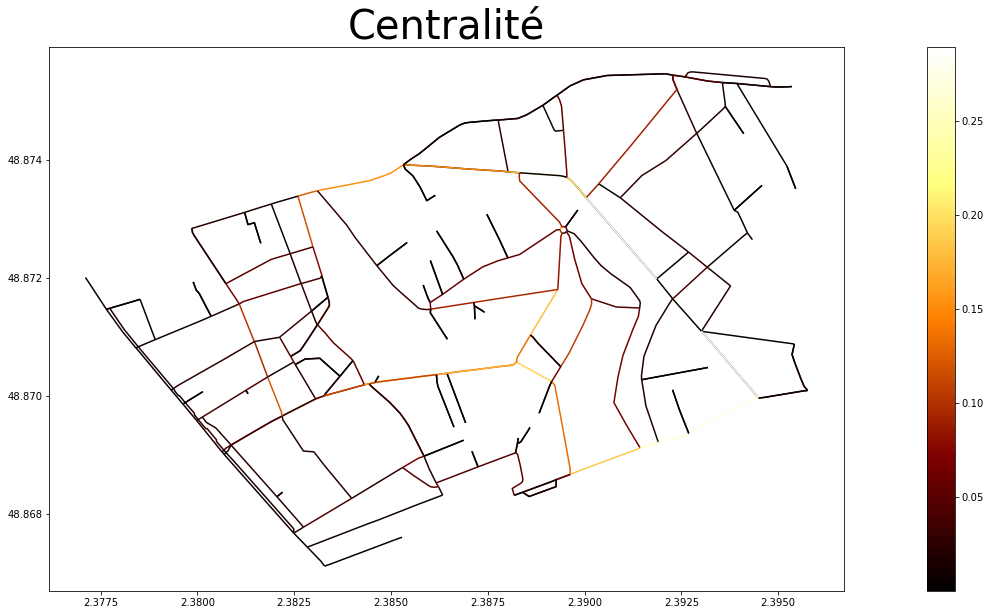

In [63]:
# Affichage
edges.plot(column= 'Centralité', figsize=(30, 10), legend=True, cmap="afmhot")
plt.title("Centralité", fontsize=40)

## IV) Traitement des données altimétriques

In [64]:
#Chargement des données relatives à l'altitude
dem = pd.read_csv('opendata_paris_nivel_lat_long.csv', index_col=0)

In [65]:
dem.head()

,OBJECTID,NUMERO,IMMEUBLE,DESIGNATION,DENOMINATION,COMPLEMENT,ALTITUDE,ANNEE,X,Y,TYP,geo_shape,geo_point_2d,lat,long
0,14347,rn33088,1,Rue du,CARDINAL MERCIER,#,49.488,1985,599438.429,131177.365,ENSERVICE,"{""type"": ""Point"", ""coordinates"": [2.3288668703...","48.8810365523,2.32886687038",48.881037,2.328867
1,14355,rn39097,26,Boulevard de,STRASBOURG,#,35.152,1985,601405.488,130114.709,ENSERVICE,"{""type"": ""Point"", ""coordinates"": [2.3556839617...","48.8714789852,2.35568396171",48.871479,2.355684
2,14364,rn32111,29,Rue de,LISBONNE,Angle rue Mollien,44.063,1983,598304.037,130793.953,ENSERVICE,"{""type"": ""Point"", ""coordinates"": [2.3134011689...","48.8775865507,2.31340116892",48.877587,2.313401
3,14398,rn35028,2,Rue de,TREVISE,Angle rue Bergère,34.260,1985,600625.250,130230.618,ENSERVICE,"{""type"": ""Point"", ""coordinates"": [2.3450476960...","48.8725226215,2.34504769608",48.872523,2.345048
4,14423,rn69285,11,Rue,ANGELIQUE COMPOINT,#,51.581,1988,599921.094,132983.730,ENSERVICE,"{""type"": ""Point"", ""coordinates"": [2.3354474590...","48.8972809918,2.33544745901",48.897281,2.335447


In [66]:
#Création d'un géodataframe
gdf = gpd.GeoDataFrame(dem,crs="EPSG:4326",geometry=gpd.points_from_xy(dem.long, dem.lat))

In [67]:
edges.head()

,osmid,oneway,name,highway,maxspeed,junction,length,geometry,service,tunnel,lanes,access,u,v,key,Centralité
0,888909893,True,Place Henri Krasucki,residential,30,circular,1.707,"LINESTRING (2.38953 48.87279, 2.38954 48.87281)",NaN,NaN,NaN,NaN,60912115,682260684,0,0.085371
1,336799975,True,Rue des Cascades,residential,30,NaN,285.610,"LINESTRING (2.39142 48.87149, 2.39139 48.87135...",NaN,NaN,NaN,NaN,60912123,96149597,0,0.065760
2,23091562,False,Rue Levert,pedestrian,NaN,NaN,39.885,"LINESTRING (2.38950 48.87287, 2.38982 48.87316)",NaN,NaN,NaN,NaN,60912205,268499816,0,0.005194
3,8119320,True,Place Henri Krasucki,residential,30,circular,6.934,"LINESTRING (2.38950 48.87287, 2.38948 48.87287...",NaN,NaN,NaN,NaN,60912205,250732799,0,0.068285
4,164379591,True,Rue des Couronnes,residential,30,NaN,100.410,"LINESTRING (2.38931 48.87181, 2.38921 48.87170...",NaN,NaN,NaN,NaN,60912206,268499229,0,0.179677


Text(0.5, 1.0, 'Carte des noeuds  de Paris)')

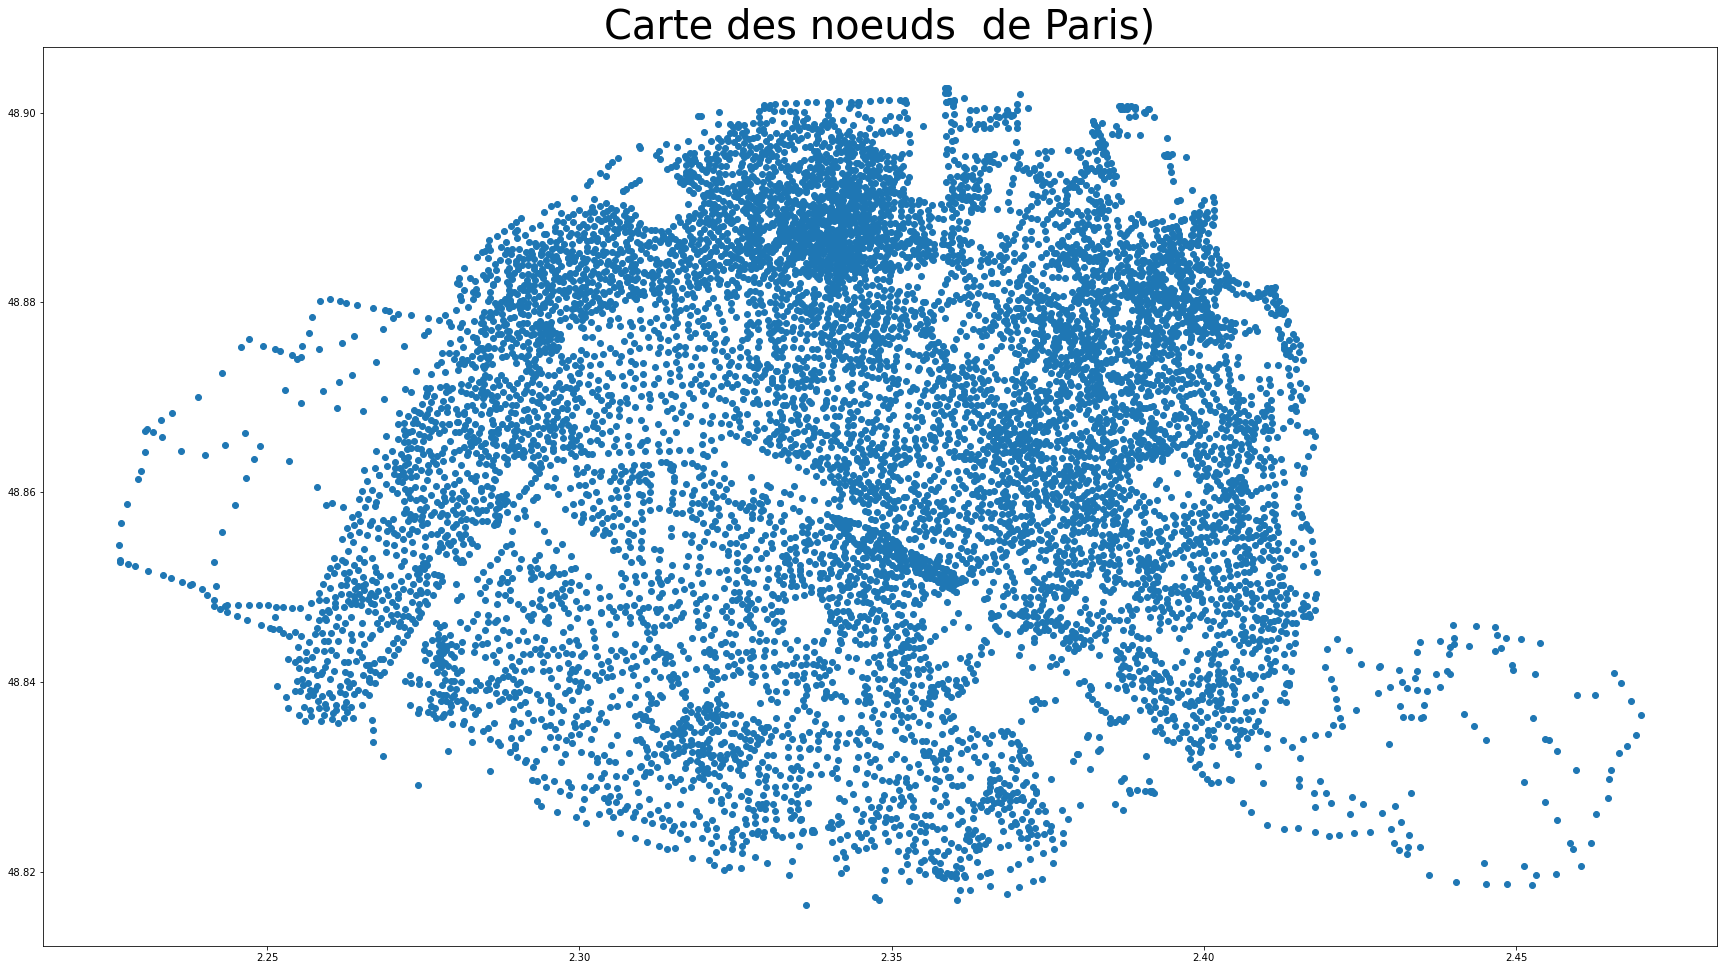

In [68]:
# Carte des noeuds
gdf.plot(figsize=(30, 30))
plt.title("Carte des noeuds  de Paris)", fontsize=40)

## V) Interpolation

In [69]:
#Réalisation d'une interpolation pour faire correspondre l'emplacement des noeuds aux points géographiques. Méthode des polygones de Voronoï.
x=dem['long']
y=dem['lat']

coord = np.column_stack((x, y))

region_df, point_df = voronoi_frames(coord)

gdf['geometry']=region_df['geometry']

In [70]:
gdf.head()

,OBJECTID,NUMERO,IMMEUBLE,DESIGNATION,DENOMINATION,COMPLEMENT,ALTITUDE,ANNEE,X,Y,TYP,geo_shape,geo_point_2d,lat,long,geometry
0,14347,rn33088,1,Rue du,CARDINAL MERCIER,#,49.488,1985,599438.429,131177.365,ENSERVICE,"{""type"": ""Point"", ""coordinates"": [2.3288668703...","48.8810365523,2.32886687038",48.881037,2.328867,"POLYGON ((2.32986 48.88084, 2.32839 48.88056, ..."
1,14355,rn39097,26,Boulevard de,STRASBOURG,#,35.152,1985,601405.488,130114.709,ENSERVICE,"{""type"": ""Point"", ""coordinates"": [2.3556839617...","48.8714789852,2.35568396171",48.871479,2.355684,"POLYGON ((2.35461 48.87187, 2.35481 48.87208, ..."
2,14364,rn32111,29,Rue de,LISBONNE,Angle rue Mollien,44.063,1983,598304.037,130793.953,ENSERVICE,"{""type"": ""Point"", ""coordinates"": [2.3134011689...","48.8775865507,2.31340116892",48.877587,2.313401,"POLYGON ((2.31344 48.87679, 2.31256 48.87759, ..."
3,14398,rn35028,2,Rue de,TREVISE,Angle rue Bergère,34.260,1985,600625.250,130230.618,ENSERVICE,"{""type"": ""Point"", ""coordinates"": [2.3450476960...","48.8725226215,2.34504769608",48.872523,2.345048,"POLYGON ((2.34505 48.87305, 2.34556 48.87260, ..."
4,14423,rn69285,11,Rue,ANGELIQUE COMPOINT,#,51.581,1988,599921.094,132983.730,ENSERVICE,"{""type"": ""Point"", ""coordinates"": [2.3354474590...","48.8972809918,2.33544745901",48.897281,2.335447,"POLYGON ((2.33585 48.89784, 2.33608 48.89709, ..."


<AxesSubplot:>

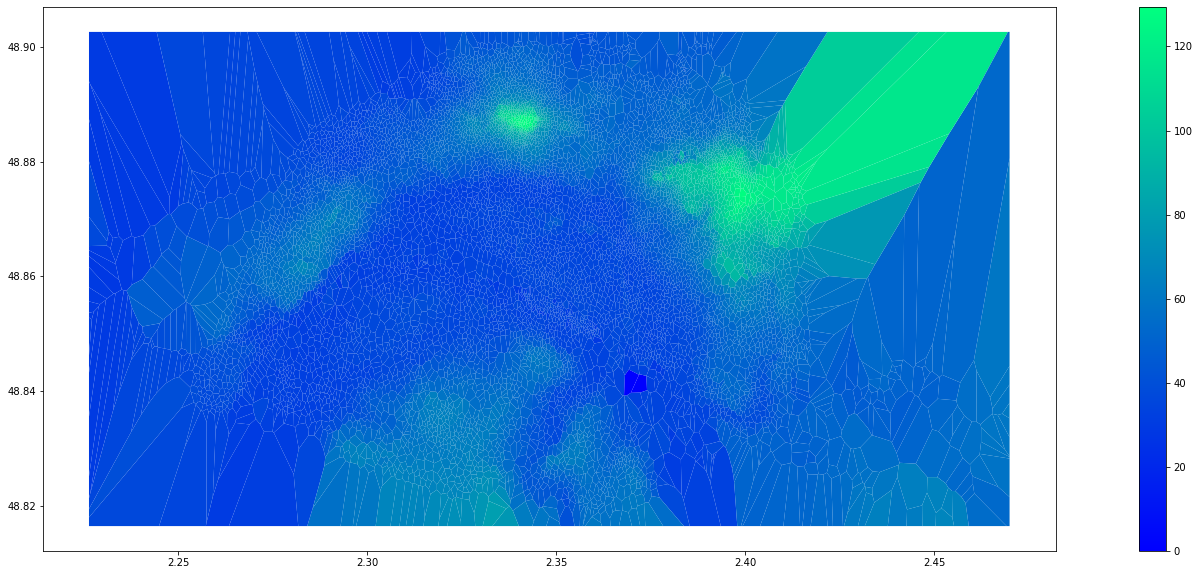

In [71]:
# Première carte d'interpolation avec prise en compte de l'altitude
gdf.plot(column= 'ALTITUDE', figsize=(30, 10), legend=True,cmap="winter")

In [72]:
#Dataframe des contours de Paris
paris=gpd.read_file(r'arrondissements.shp', geom_col='geom')

In [73]:
#Incorporation des contours de Paris à l'interpolation
intersection = gpd.overlay(gdf, paris, how='intersection')

Text(0.5, 1.0, 'Altimétries Paris par interpolation (méthode des polygones de Voronoi)')

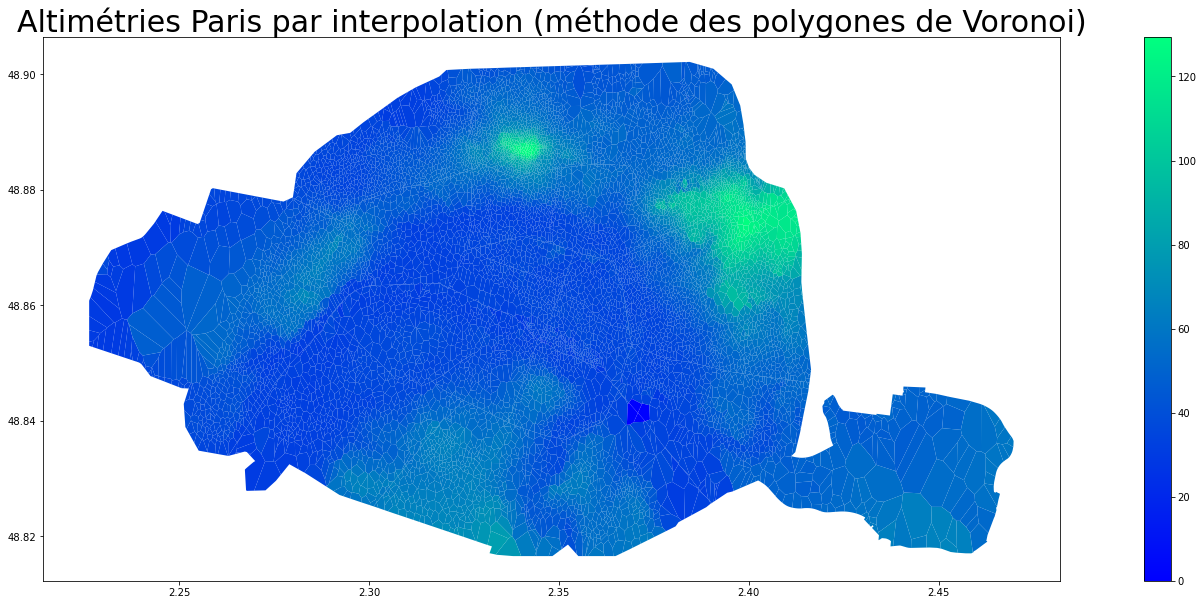

In [74]:
#Seconde carte d'interpolation englobant exclusivement Paris
intersection.plot(column= 'ALTITUDE', figsize=(30, 10), legend=True,cmap="winter")
plt.title("Altimétries Paris par interpolation (méthode des polygones de Voronoi)", fontsize=30)

In [75]:
###vérification des systèmes de projection
nodes.crs==intersection.crs

True

In [76]:
###jointure spatiale
nodes_geo = gpd.sjoin(nodes, intersection, how="left", op='intersects')

In [77]:
#Calcul du pourcentage de pente des arêtes

for index, row in edges.iterrows():
    
    for index1, row1 in nodes_geo.iterrows():
        
        if (index1 == row['u']):
            edges.at[index, 'altitude_u'] = row1['ALTITUDE']

    for index1, row1 in nodes_geo.iterrows():
        
        if (index1 == row['v']):
            edges.at[index, 'altitude_v'] =  row1['ALTITUDE']
            
edges['alt'] =  edges['altitude_v'] - edges['altitude_u']
edges['pourcentage_altitude'] =  (edges['altitude_v'] - edges['altitude_u']) / edges['altitude_v'] * 100

In [78]:
edges['pourcentage_altitude'].describe()

count    304.000000
mean      -0.115653
std        5.490140
min      -19.158765
25%       -2.321863
50%        0.000000
75%        2.336400
max       16.078352
Name: pourcentage_altitude, dtype: float64

## VI) Conditions et indice de confort

In [79]:
# Création d'une liste de conditions
conditions = [
    (  ((edges['pourcentage_altitude'] < -8))   ),
    (  ((edges['pourcentage_altitude'] <-5) & (edges['pourcentage_altitude'] >= -8))   ),
    (  ((edges['pourcentage_altitude'] <-4) & (edges['pourcentage_altitude'] >= -5))   ),
    (  ((edges['pourcentage_altitude'] <-3) & (edges['pourcentage_altitude'] >= -4))   ),
    (  ((edges['pourcentage_altitude'] <-2) & (edges['pourcentage_altitude'] >= -3))   ),
    (  ((edges['pourcentage_altitude'] <-1) & (edges['pourcentage_altitude'] >= -2))   ),
    (  ((edges['pourcentage_altitude'] <0) & (edges['pourcentage_altitude'] >= -1))   ),
    (  ((edges['pourcentage_altitude'] < 1) & (edges['pourcentage_altitude'] >= 0))   ),
    (  ((edges['pourcentage_altitude'] < 2) & (edges['pourcentage_altitude'] >= 1))   ),
    (  ((edges['pourcentage_altitude'] < 3) & (edges['pourcentage_altitude'] >= 2))   ),
    (  ((edges['pourcentage_altitude'] < 4) & (edges['pourcentage_altitude'] >= 3))   ),
    (  ((edges['pourcentage_altitude'] < 5) & (edges['pourcentage_altitude'] >= 4))   ),
    (  ((edges['pourcentage_altitude'] <8) & (edges['pourcentage_altitude'] >= 5))   ),
    (  ((edges['pourcentage_altitude'] >= 8))   )
        ]

# Création d'une liste de valeurs à assigner pour chaque condition
values = [1,2,3,4,5,6,7,8,9,10,11,12,13,14]

# Création d'une nouvelle colonne et utilisation de np.select pour lui assigner des valeurs en utilisant nos listes comme arguments
edges['classe'] = np.select(conditions, values)

In [80]:
#confort : évite les montées, les moins fréquentée par les voitures, éviter les accidents, 
edges['confort']=edges['length']*edges['classe']

In [81]:
u=list(edges['u'])
v=list(edges['v'])
c=list(edges['confort'])

confort= list(zip(u, v, c))

for u, v,c in confort:
    plot.edges[u, v, False]['weight']= c

## VII) Calcul du plus court chemin avec indice de confort

In [82]:
# Calcul du même chemin que précédemment (cf II.) en y ajoutant notre indice de confort
start=list(plot)[150]
end=list(plot)[25]
path=nx.shortest_path(plot, start, end, weight='weight')

Text(0.5, 1.0, 'Chemin le plus confortable')

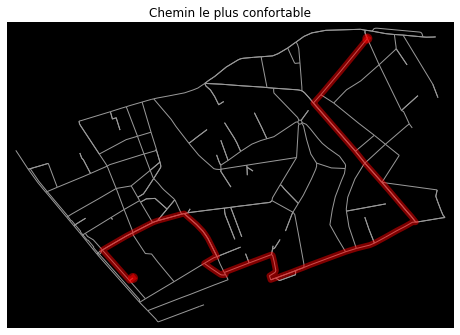

In [83]:
# Carte du chemin le plus "confortable"
fig, ax=ox.plot_graph_route(plot, path, route_linewidth=6, node_size=0, bgcolor='k',show=False,close=False)
ax.set_title('Chemin le plus confortable')

## VIII) Ensemble des plus courts chemins avec indice de confort

In [84]:
# Incorporation d'un "poids" aux arêtes, variant en fonction de leur pourcentage de pente
edge_beetween2 = nx.edge_betweenness_centrality(plot, weight="weight")

In [85]:
beetweeness_dict2=[(a,b, weight) for (a,b), weight in edge_beetween2.items()]

In [86]:
beetweeness_df2=pd.DataFrame.from_dict(beetweeness_dict2)

beetweeness_df2=beetweeness_df2.rename(columns={0: "u", 1: "v", 2:"beetweeness_edge"})

beetweeness_df2.head()

,u,v,beetweeness_edge
0,60912115,682260684,0.085371
1,60912123,96149597,0.065760
2,60912205,268499816,0.005194
3,60912205,250732799,0.068285
4,60912206,268499229,0.179677


Pour cette dernière étape, nous souhaitions utiliser Networkx mais nous ne sommes pas parvenu à incorporer la prise en compte du poids des arrêtes (et donc de leur altitude), dans le calcul de notre carte des centralités. N'ayant pas de raison apparente à cette erreur, nous souhaitions envoyer un rapport d'erreur aux développeurs de la bibliothèque sur GitHub. Nous avons cependant découvert que des rapports exposant le même problème avaient déjà été réalisés [le 9 mai 2019](https://github.com/networkx/networkx/issues/3432), ainsi que [le 18 octobre 2020](https://github.com/networkx/networkx/issues/4270). Il semblerait qu'il s'agisse en effet d'une erreur non corrigée empèchant Networkx d'incorporer un poids à des valeurs dans un MultiGraph.<br>

Nous avons tout de même tenté d'implémenter l'algorithme suivant afin de l'utiliser par la suite avec l'altitude :

>ensemble_chemin = []

>for i in range(0,len(plot)):
>>    for j in range(0,len(plot)):
>>>        orig=list(plot)[i]
>>>        dest=list(plot)[j]
>>>        if nx.has_path(plot, orig, dest)==True:
>>>>            route=nx.shortest_path(graph, orig, dest)
>>>>            ensemble_chemin.append(route)

>edges['beetweness'] = np.zeros(edges.shape[0])

>for chemin in ensemble_chemin:
>>    for i in chemin:
>>>        for j in chemin:
>>>>            edges.loc[(edges['u'] == i) & (edges['v']==j), 'beetweness'] = edges.loc[(edges['u'] == i) & (edges['v']==j), 'beetweness'] + 1


Seulement le temps de chargement étant trop long, nous n'avons pu aboutir au résultat souhaité.


Nous ne sommes donc pas parvenus à résoudre ce problème.